In [126]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Problem Statement:
    Given the feature values classify whether it belings to class 1 or 0

In [88]:
data = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/K-NEarest-Neighbor/master/Classified%20Data",index_col=0)
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [14]:
data.shape

(1000, 11)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [39]:
# Standardize the feature values
from sklearn.preprocessing import StandardScaler

In [89]:
scaler = StandardScaler()

In [41]:
data.iloc[:,:-1]

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167
...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063


In [90]:
scaler.fit(data.iloc[:,:-1])

StandardScaler()

In [91]:
scaled_features = scaler.fit_transform(data.iloc[:,:-1])
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [92]:
y = data.loc[:,'TARGET CLASS']
y

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    1
Name: TARGET CLASS, Length: 1000, dtype: int64

In [93]:
# Train test splitting
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(scaled_features,y,test_size=0.30)
print("x_train size:{} \n x_test size:{}".format(x_train.shape,x_test.shape))
print("y_train size:{} \n y_test size:{}".format(y_train.shape,y_test.shape))

x_train size:(700, 10) 
 x_test size:(300, 10)
y_train size:(700,) 
 y_test size:(300,)


In [73]:
import numpy as np
np.where(x_test)

(array([  0,   0,   0, ..., 299, 299, 299], dtype=int64),
 array([0, 1, 2, ..., 7, 8, 9], dtype=int64))

## Using KNN

In [128]:
model1 = KNeighborsClassifier(n_neighbors=1)
model1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [129]:
pred = model1.predict(x_test)
pred

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1], d

## Predictions and Evaluations

In [130]:
from sklearn.metrics import classification_report, confusion_matrix

In [131]:
print(confusion_matrix(y_test,pred))

[[132  16]
 [ 16 136]]


In [133]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       148
           1       0.89      0.89      0.89       152

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [134]:
metrics.accuracy_score(y_test,pred)

0.8933333333333333

## Choosing a K value

In [135]:
error_rate = []

for i in range(1,40):
    knn =  KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(y_test != pred_i))

In [136]:
error_rate

[0.10666666666666667,
 0.10333333333333333,
 0.08666666666666667,
 0.09666666666666666,
 0.08,
 0.08333333333333333,
 0.09,
 0.07333333333333333,
 0.08333333333333333,
 0.08,
 0.07333333333333333,
 0.06666666666666667,
 0.07,
 0.07333333333333333,
 0.07666666666666666,
 0.07,
 0.07333333333333333,
 0.07,
 0.06666666666666667,
 0.06666666666666667,
 0.06,
 0.06333333333333334,
 0.06,
 0.06,
 0.056666666666666664,
 0.06,
 0.06333333333333334,
 0.06333333333333334,
 0.06,
 0.06333333333333334,
 0.06333333333333334,
 0.06666666666666667,
 0.06333333333333334,
 0.06333333333333334,
 0.06333333333333334,
 0.06,
 0.06,
 0.06333333333333334,
 0.06]

Text(0, 0.5, 'Error Rate')

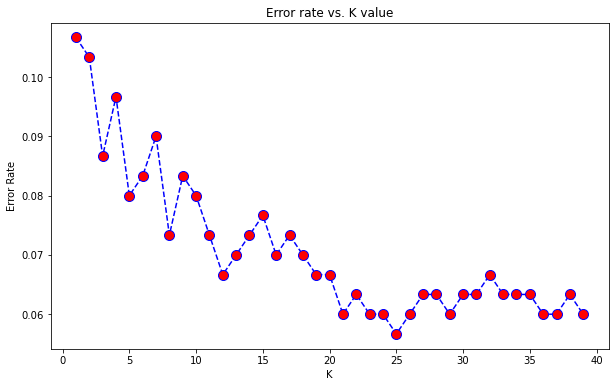

In [137]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Error rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [142]:
# If k =1 
model1 = KNeighborsClassifier(n_neighbors=1)
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))                       

[[132  16]
 [ 16 136]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       148
           1       0.89      0.89      0.89       152

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [101]:
# if k =22 and see the how precision and accuracy changed

In [138]:
knn2 = KNeighborsClassifier(n_neighbors=22)
knn2.fit(x_train,y_train)
predictions = knn2.predict(x_test)

In [139]:
print(confusion_matrix(y_test,predictions))

array([[137,  11],
       [  8, 144]], dtype=int64)

In [140]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       148
           1       0.93      0.95      0.94       152

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [141]:
metrics.accuracy_score(y_test,predictions)

0.9366666666666666

In [ ]:
# Checking whether train and test sets are balanced (frequency of class1 and class2 is maintained same in both)

In [143]:
a = np.where(y_train==1)
print("class 1: ",len(a[0])/len(y_train))
b = np.where(y_train==0)
print("class 2: ",len(b[0])/len(y_train))

class 1:  0.49714285714285716
class 2:  0.5028571428571429


In [144]:
a = np.where(y_test==1)
print("class 1: ",len(a[0])/len(y_test))
b = np.where(y_test==0)
print("class 2: ",len(b[0])/len(y_test))

class 1:  0.5066666666666667
class 2:  0.49333333333333335


In [145]:
# cross validation :to check the model performance

In [148]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model1,x_train,y_train,cv=10))

[0.92857143 0.95714286 0.92857143 0.91428571 0.9        0.92857143
 0.9        0.94285714 0.9        0.88571429]


In [155]:
(cross_val_score(model1,x_train,y_train,cv=10,scoring='accuracy').mean())

0.9185714285714287

In [158]:
print(cross_val_score(knn2,x_train,y_train,cv=10,scoring='accuracy').mean())
print(cross_val_score(knn2,x_train,y_train,cv=10,scoring='accuracy').min())
print(cross_val_score(knn2,x_train,y_train,cv=10,scoring='accuracy').max())

0.9414285714285715
0.9
0.9714285714285714


In [159]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
print(cross_val_score(reg,x_train,y_train,cv=10,scoring='accuracy').mean())
print(cross_val_score(reg,x_train,y_train,cv=10,scoring='accuracy').min())
print(cross_val_score(reg,x_train,y_train,cv=10,scoring='accuracy').max())

0.9485714285714286
0.9
0.9714285714285714
